Data Set Information:

We use the following representation to collect the dataset

age - age

bp - blood pressure

sg - specific gravity

al - albumin

su - sugar

rbc - red blood cells

pc - pus cell

pcc - pus cell clumps

ba - bacteria

bgr - blood glucose random

bu - blood urea

sc - serum creatinine

sod - sodium

pot - potassium

hemo - hemoglobin

pcv - packed cell volume

wc - white blood cell count

rc - red blood cell count

htn - hypertension

dm - diabetes mellitus

cad - coronary artery disease

appet - appetite

pe - pedal edema

ane - anemia

classification - class

USING KAGGLE API TO FETCH DATA AND DOWNLOAD IT DIRECTLY TO DBFS

In [0]:
%sh pip install kaggle
%sh
export KAGGLE_USERNAME="nishasharma15"
export KAGGLE_KEY="5bddd855d97cf97987c0b59dc4ddf57f"
kaggle datasets download -d mansoordaku/ckdisease


  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=f61a7bfe74eeb0adb902eac89bcc66b97d506143786e02b1d96379758d7e949f
  Stored in directory: /root/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.
/bin/bash: line 1: fg: no job control

  0%|          | 0.00/9.51k [00:00<?, ?B/s]
100%|██████████| 9.51k/9.51k [00:00<00:00, 7.11MB/s]



In [0]:
%sh unzip ckdisease.zip 

dbutils.fs.cp("file:/databricks/driver/kidney_disease.csv", 
   "/FileStore/kidney_disease.csv")

Archive:  ckdisease.zip
  inflating: kidney_disease.csv      
/bin/bash: -c: line 2: syntax error near unexpected token `"file:/databricks/driver/kidney_disease.csv",'
/bin/bash: -c: line 2: `dbutils.fs.cp("file:/databricks/driver/kidney_disease.csv", '


In [0]:
#read datset
df = spark.read.csv('/FileStore/kidney_disease.csv', inferSchema =True,sep=',', header=True)

In [0]:
df.limit(10).display()

id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,null,normal,notpresent,notpresent,121.0,36.0,1.2,null,null,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,null,normal,notpresent,notpresent,null,18.0,0.8,null,null,11.3,38,6000,null,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,null,null,9.6,31,7500,null,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,null,null,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,null,null,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.01,0.0,0.0,null,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36,null,null,no,no,no,good,no,no,ckd
7,24.0,null,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,null,null,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,null,null,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.02,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [0]:
# SHAPE OF DAtASET
print((df.count(), len(df.columns)))

(400, 26)


In [0]:
#SCHEMA OF DATASET
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- bp: double (nullable = true)
 |-- sg: double (nullable = true)
 |-- al: double (nullable = true)
 |-- su: double (nullable = true)
 |-- rbc: string (nullable = true)
 |-- pc: string (nullable = true)
 |-- pcc: string (nullable = true)
 |-- ba: string (nullable = true)
 |-- bgr: double (nullable = true)
 |-- bu: double (nullable = true)
 |-- sc: double (nullable = true)
 |-- sod: double (nullable = true)
 |-- pot: double (nullable = true)
 |-- hemo: double (nullable = true)
 |-- pcv: string (nullable = true)
 |-- wc: string (nullable = true)
 |-- rc: string (nullable = true)
 |-- htn: string (nullable = true)
 |-- dm: string (nullable = true)
 |-- cad: string (nullable = true)
 |-- appet: string (nullable = true)
 |-- pe: string (nullable = true)
 |-- ane: string (nullable = true)
 |-- classification: string (nullable = true)



In [0]:
# NULL VALUES IN ALL THE COLUMNS
for col in df.columns:
    print(col, "\t", "with null values: ", df.filter(df[col].isNull()).count())

id 	 with null values:  0
age 	 with null values:  9
bp 	 with null values:  12
sg 	 with null values:  47
al 	 with null values:  46
su 	 with null values:  49
rbc 	 with null values:  152
pc 	 with null values:  65
pcc 	 with null values:  4
ba 	 with null values:  4
bgr 	 with null values:  44
bu 	 with null values:  19
sc 	 with null values:  17
sod 	 with null values:  87
pot 	 with null values:  88
hemo 	 with null values:  52
pcv 	 with null values:  70
wc 	 with null values:  105
rc 	 with null values:  130
htn 	 with null values:  2
dm 	 with null values:  2
cad 	 with null values:  2
appet 	 with null values:  1
pe 	 with null values:  1
ane 	 with null values:  1
classification 	 with null values:  0


In [0]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [0]:
# SEPRATING NUMERICAL AND CATEGORICAL COLUMNS
str_cols = [f.name for f in df.schema.fields if isinstance(f.dataType, StringType)]
num_cols = [f.name for f in df.schema.fields if isinstance(f.dataType, DoubleType)]
num_cols = num_cols+[f.name for f in df.schema.fields if isinstance(f.dataType, IntegerType)]

In [0]:
# DROP NULL VALUES FROM DATASET
df = df.na.drop("any")

In [0]:
# DESCRIPTION OF NUMERICAL COLUMNS
for num_col in num_cols:
    df.describe([num_col]).display()

summary,age
count,158
mean,49.563291139240505
stddev,15.512244411400605
min,6.0
max,83.0


summary,bp
count,158
mean,74.0506329113924
stddev,11.175380965508966
min,50.0
max,110.0


summary,sg
count,158
mean,1.019873417721521
stddev,0.005498968261323924
min,1.005
max,1.025


summary,al
count,158
mean,0.7974683544303798
stddev,1.4131299392153676
min,0.0
max,4.0


summary,su
count,158
mean,0.25316455696202533
stddev,0.8133966594563631
min,0.0
max,5.0


summary,bgr
count,158
mean,131.34177215189874
stddev,64.93983223609534
min,70.0
max,490.0


summary,bu
count,158
mean,52.575949367088604
stddev,47.39538184708022
min,10.0
max,309.0


summary,sc
count,158
mean,2.1886075949367085
stddev,3.0776153951065295
min,0.4
max,15.2


summary,sod
count,158
mean,138.84810126582278
stddev,7.489421172084283
min,111.0
max,150.0


summary,pot
count,158
mean,4.636708860759492
stddev,3.476350572544877
min,2.5
max,47.0


summary,hemo
count,158
mean,13.687341772151898
stddev,2.882203999578559
min,3.1
max,17.8


summary,id
count,158
mean,274.84177215189874
stddev,102.99851722090816
min,3
max,399


In [0]:
df.groupBy('classification').count().show()

+--------------+-----+
|classification|count|
+--------------+-----+
|        notckd|  115|
|           ckd|   43|
+--------------+-----+



We see that there is a presence of 'ckd\t' class we merge it with ckd

In [0]:
df = df.withColumn('classification', when(df['classification']=='ckd\t', lit("ckd"))
                                     .otherwise(df['classification']))

A pieplot function that converts dataframe to pandas and then display output

In [0]:
import matplotlib.pyplot as plt

In [0]:
def pieplot(df, col, lim=10, yname=None):
    classes = df.groupBy(col).count().orderBy('count', ascending=False)  
    pd_df = classes.limit(lim).toPandas()
    pd_df.plot(kind='pie', x=col, y='count', \
           labels=pd_df[col], legend=False)
    plt.ylabel(None)
    plt.show()

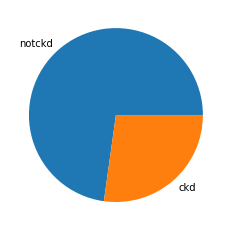

In [0]:
pieplot(df, 'classification')

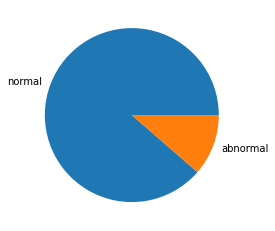

In [0]:
pieplot(df, 'rbc')

In [0]:
def barplot(df, col, lim=10, yname=None): 
    
    classes = df.groupBy(col).count().orderBy('count', ascending=False)
    
    # Take first 'lim' number of rows and convert to pandas  
    pd_df = classes.limit(lim).toPandas()
    
    # Making plot 
    pd_df.plot(kind='bar', x=col, legend=False)
    plt.ylabel(yname)
    plt.show()

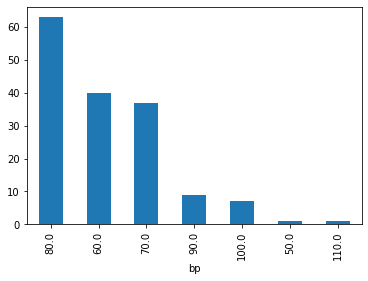

In [0]:
barplot(df, 'bp', lim=20)

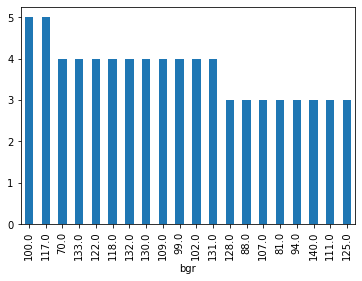

In [0]:
barplot(df, 'bgr', lim=20)

Using Pandas API

In [0]:
import pandas as pd
import pyspark.pandas as ps

In [0]:
df_ps = ps.DataFrame(df)

In [0]:
df_ps["bgr"].plot.box()

THE BELOW GRAPH SHOWS RELATION OF BP AND CLASSIFICATION

In [0]:

df_ps_bp = ps.DataFrame(df.groupBy("classification", "htn").agg(avg("bp")))
df_ps_bp.plot.bar(x="classification",y='avg(bp)')

- HIGHER BP CORRESPONDS TO MORE CHANCES OF HAVEING KIDNEY DISEASE

In [0]:
df_ps_bgr1 = ps.DataFrame(df.groupBy("classification", "htn").agg(avg("bgr")))
df_ps_bgr1.plot.bar(x="classification",y='avg(bgr)')

- HYPERTENSION ALSO CORRESPONDS TO HIGHER RISK

In [0]:
df_ps_bgr2 = ps.DataFrame(df.groupBy("ane").agg(avg("bgr")))
df_ps_bgr2.plot.bar(x="ane",y='avg(bgr)')

- THERE ARE HIGHER CHANCES OF HIGH BLOOD SUGAR IF YOU ARE ANEMIC

In [0]:
df_ps_age1 = ps.DataFrame(df.groupBy("classification").agg(avg("age")))
df_ps_age1.plot.bar(x="classification",y='avg(age)')

- AGE HAS NO RELATION WITH DISEASE

In [0]:
df_ps_su = ps.DataFrame(df.groupBy("classification").agg(avg("sod")))
df_ps_su.plot.bar(x="classification",y='avg(sod)')

- Sodium has no relation with getting diease as per the dataset